# Preguntas 11 y 12

# Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
y = data["Sales"]

In [4]:
x1 = X[["TV"]]
x2 = X[["Radio"]]
x3 = X[["Newspaper"]]

In [7]:
from sklearn.linear_model import LinearRegression

modelo_1 = LinearRegression()
modelo_1.fit(X,y)

LinearRegression()

In [8]:
print("Coeficientes: ",modelo_1.coef_)
print("Pendiente: ",modelo_1.intercept_)

Coeficientes:  [ 0.04576465  0.18853002 -0.00103749]
Pendiente:  2.9388893694594103


In [9]:
preds_1 = modelo_1.predict(X)

In [10]:
from sklearn.metrics import r2_score

r2_score(preds_1,y)

0.885434526244944

In [11]:
# Modelo para X1
modelo_x1 = LinearRegression()
modelo_x1.fit(x1,y)

# Modelo para X2
modelo_x2 = LinearRegression()
modelo_x2.fit(x2,y)

# Modelo para X3
modelo_x3 = LinearRegression()
modelo_x3.fit(x3,y)

LinearRegression()

In [12]:
preds_x1 = modelo_x1.predict(x1)
preds_x2 = modelo_x2.predict(x2)
preds_x3 = modelo_x3.predict(x3)

In [13]:
print("Modelo x1: ",r2_score(preds_x1,y))
print("Modelo x2: ",r2_score(preds_x2,y))
print("Modelo x3: ",r2_score(preds_x3,y))

Modelo x1:  0.36567940037641455
Modelo x2:  -1.0117537716572929
Modelo x3:  -17.18632873290735


# Feature engineer Pregunta 13

In [14]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


* Remover registros duplicados

* Ver si hay valores nulos y eliminarlos

* Quitar la columna region

* Genere variables dummies (binarias) para el género de la persona y si es fumador o no, pensando en añadirlas posteriormente como variables independientes para explicar "charges".

In [19]:
df.duplicated()
df_limpio = df.drop_duplicates()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1314 non-null   float64
 1   sex       1332 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1332 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1314 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.2+ KB


In [22]:
df_limpio = df_limpio.dropna()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1304 non-null   float64
 1   sex       1304 non-null   object 
 2   bmi       1304 non-null   float64
 3   children  1304 non-null   int64  
 4   smoker    1304 non-null   object 
 5   region    1304 non-null   object 
 6   charges   1304 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 81.5+ KB


In [24]:
df_limpio = df_limpio.drop(["region"],axis=1)
df_limpio.head()

,age,sex,bmi,children,smoker,charges
0,19.0,female,27.900,0,yes,16884.92400
1,18.0,male,33.770,1,no,1725.55230
2,28.0,male,33.000,3,no,4449.46200
3,33.0,male,22.705,0,no,21984.47061
4,32.0,male,28.880,0,no,3866.85520


In [32]:
df_final = pd.get_dummies(df_limpio)
df_final.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19.0,27.900,0,16884.92400,True,False,False,True
1,18.0,33.770,1,1725.55230,False,True,True,False
2,28.0,33.000,3,4449.46200,False,True,True,False
3,33.0,22.705,0,21984.47061,False,True,True,False
4,32.0,28.880,0,3866.85520,False,True,True,False


In [35]:
X2 = df_final[["age","bmi","children","sex_female","sex_male","smoker_no","smoker_yes"]]
y2 = df_final["charges"]
X2.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19.0,27.900,0,True,False,False,True
1,18.0,33.770,1,False,True,True,False
2,28.0,33.000,3,False,True,True,False
3,33.0,22.705,0,False,True,True,False
4,32.0,28.880,0,False,True,True,False


In [40]:
modelo_2 = LinearRegression()
modelo_2.fit(X2,y2)

LinearRegression()

In [43]:
modelo_2.intercept_

-272.25135499303906

In [41]:
preds2 = modelo_2.predict(X2)

In [42]:
r2_score(preds2,y2)

0.6630973294798214

## Correlacion de columnas Pregunta 14

In [45]:
df = pd.read_csv("ML_Houses_dataset.csv")
df_houses = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
                       'Pesos', 'Alley', 'WallMat','SalePrice']]

df_houses.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,WallMat,SalePrice
0,1710,3,1,5,4170000.0,NaN,Concrete,208500
1,1262,3,1,8,3630000.0,NaN,Wood,181500
2,1786,3,1,5,4470000.0,NaN,Wood,223500
3,1717,3,1,5,2800000.0,NaN,Concrete,140000
4,2198,4,1,5,5000000.0,NaN,Concrete,250000


In [48]:
df_houses2 = pd.get_dummies(df_houses)
df_houses2.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,Alley_Grvl,Alley_Pave,WallMat_Concrete,WallMat_Wood
0,1710,3,1,5,4170000.0,208500,False,False,True,False
1,1262,3,1,8,3630000.0,181500,False,False,False,True
2,1786,3,1,5,4470000.0,223500,False,False,False,True
3,1717,3,1,5,2800000.0,140000,False,False,True,False
4,2198,4,1,5,5000000.0,250000,False,False,True,False


<Axes: >

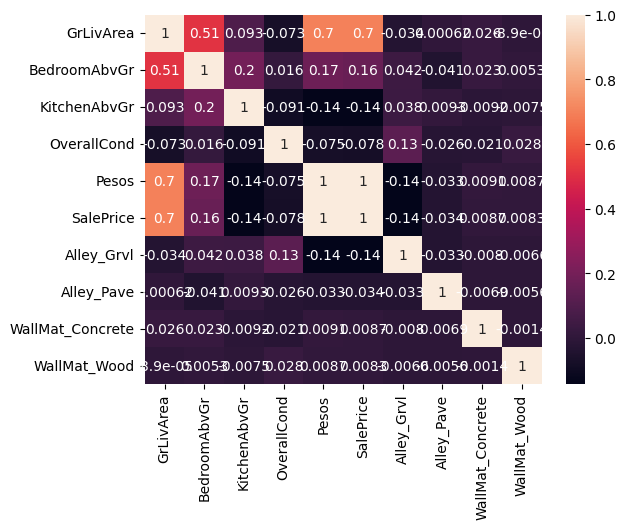

In [49]:
corr = df_houses2.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

# Clasificacion Pregunta 15

In [54]:
df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],
                                        bins=[df_houses['SalePrice'].min()-1,
                                        df_houses['SalePrice'].mean(),
                                        df_houses['SalePrice'].max()+1],
                                        labels=['barato', 'caro'])

C:\Users\dmon2\AppData\Local\Temp\ipykernel_16856\3944991160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],


In [55]:
df_houses

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,WallMat,SalePrice,SalePriceBinary
0,1710,3,1,5,4170000.0,NaN,Concrete,208500,caro
1,1262,3,1,8,3630000.0,NaN,Wood,181500,barato
2,1786,3,1,5,4470000.0,NaN,Wood,223500,caro
3,1717,3,1,5,2800000.0,NaN,Concrete,140000,barato
4,2198,4,1,5,5000000.0,NaN,Concrete,250000,caro
...,...,...,...,...,...,...,...,...,...
1755,2073,3,1,6,4200000.0,NaN,NaN,210000,caro
1756,1125,2,1,5,3100000.0,NaN,NaN,155000,barato
1757,1640,3,1,5,3460000.0,NaN,NaN,173000,barato
1758,2229,5,1,6,2080000.0,NaN,NaN,104000,barato


In [56]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y_encoder = LabelEncoder().fit(df_houses['SalePriceBinary'])
y = y_encoder.transform(df_houses['SalePriceBinary'])
X = df_houses.drop(columns=['GrLivArea','Alley','WallMat', 'SalePrice', 'SalePriceBinary'])

X_scaled = MinMaxScaler().fit_transform(X)

In [66]:
X_scaled

array([[0.375     , 0.33333333, 0.5       , 0.24107763],
       [0.375     , 0.33333333, 0.875     , 0.20358284],
       [0.375     , 0.33333333, 0.5       , 0.26190807],
       ...,
       [0.375     , 0.33333333, 0.5       , 0.19177892],
       [0.625     , 0.33333333, 0.625     , 0.09595889],
       [0.25      , 0.33333333, 0.875     , 0.10151368]])

Después de efectuado el procedimiento anterior, se pide utilizar validación cruzada, con cv=10 y aplicar árboles de decisión

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=123,stratify=y)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelo3 = DecisionTreeClassifier(max_depth = None)
modelo3.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
preds_train = modelo3.predict(X_train)
preds_test = modelo3.predict(X_test)

print("Accuracy para train: ",accuracy_score(y_train,preds_train))
print("Accuracy para test: ",accuracy_score(y_test,preds_test))

Accuracy para train:  0.9985795454545454
Accuracy para test:  0.9971590909090909


In [64]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X_scaled, y, cv=10)

tree_scores

array([0.98863636, 0.99431818, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [65]:
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

Accuracy para Tree: 1.00 (+/- 0.01)


# Metricas Pregunta 16

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


In [68]:
recall_score(y_true,y_pred)

0.8571428571428571

# Ajustando Metricas Pregunta 17

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
y_pred = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]



In [72]:
confusion_matrix(y_test,y_pred)

array([[2, 1],
       [2, 8]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred)

0.7692307692307693

# K-means Pregunta 18

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [75]:
random_state=42


X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

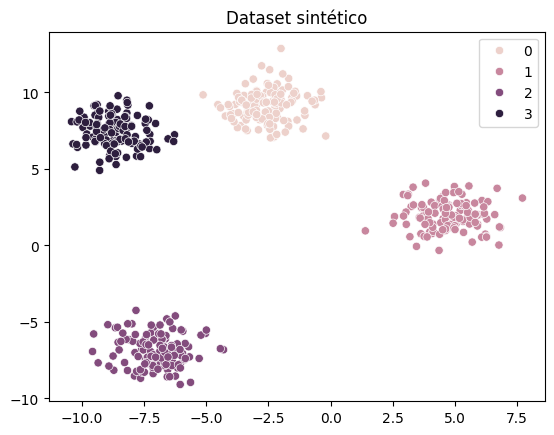

In [77]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.title('Dataset sintético')
plt.show()

In [76]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [80]:
etiquetas = kmeans.labels_
centros = kmeans.cluster_centers_

In [82]:
centros

array([[-5.64187646,  8.27394357],
       [-7.0009649 , -6.90445754],
       [ 4.72182456,  1.9238556 ]])

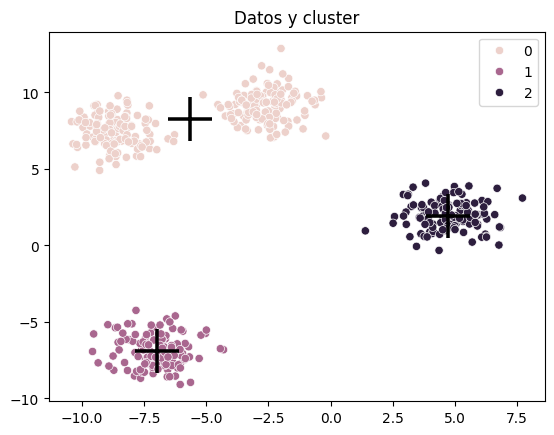

In [81]:
sns.scatterplot(x = X[:, 0], y = X[:, -1], hue = etiquetas)
sns.scatterplot(x = centros[:, 0], y = centros[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster')
plt.show()

In [87]:
kmeans.inertia_

3426.2572380059655

# SVM + Grid Search Pregunta 19

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

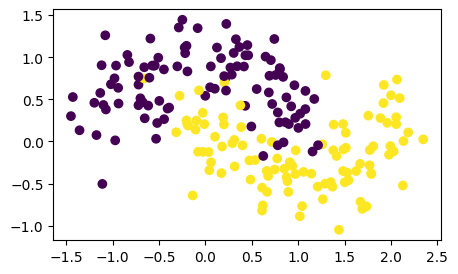

In [89]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

In [90]:
%%time

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from scipy import stats

# Instanciate model
model = SVC()

# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}

# Instanciate Random Search
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=3, verbose=0)


rsearch.fit(X,y)

CPU times: total: 1 s
Wall time: 14.7 s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'coef0': [0, 0.1, 1], 'gamma': [0, 0.1, 1, 10, 100],
                         'kernel': ['sigmoid', 'rbf']},
             scoring='accuracy')

In [91]:
rsearch.best_params_

{'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}